# Topics

- 2D pathfinding
- Game of life
- infinite arrays

In [1]:
import numpy as np
import pandas as pd
import math
import re
import sys
from shapely.geometry import Polygon
from matplotlib import pyplot as plt
from collections import Counter, OrderedDict, namedtuple, defaultdict, ChainMap
from queue import Queue
from copy import deepcopy
from functools import cmp_to_key
from itertools import product, permutations, combinations, combinations_with_replacement
from itertools import repeat
from functools import cache
import json
import time

In [2]:
sys.setrecursionlimit(1500)

In [7]:
with open("21-input", "r") as file:
    lines = file.readlines()
data_raw = [line.replace("\n", "") for line in lines]
data_raw = "\n".join(data_raw)
data_raw

'...................................................................................................................................\n....#...........#...#...........................#....................................#....##........#..........#.....#.............\n..........#...##..#.....................#.#.#..................................#.#..#..#............#........#.....................\n....#................##.....................#..........#........................##.#...#..#......#...#......#....#.................\n.#..#.................................#.................................................#..#............#..#.##.#.#.........###....\n..#...#.#.......#......#...........#................#............................................##.........#...#...#....##........\n................#.#..........#..........##..#..............................#...#................#.#......##.......#............#...\n........#.#...#..#.##.#.....#......................#.#..............

In [4]:
test_data_raw = r"""...........
.....###.#.
.###.##..#.
..#.#...#..
....#.#....
.##..S####.
.##..#...#.
.......##..
.##.#.####.
.##..##.##.
..........."""




Step = namedtuple("Step", ["direction", "number", "color"])
def preprocess_data (data):
    # dtype='U10'
    rows = [list(row) for row in data.split("\n")]
    return np.array(rows, dtype='U10')

test_data = preprocess_data(test_data_raw)
display(test_data)

array([['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.'],
       ['.', '.', '.', '.', '.', '#', '#', '#', '.', '#', '.'],
       ['.', '#', '#', '#', '.', '#', '#', '.', '.', '#', '.'],
       ['.', '.', '#', '.', '#', '.', '.', '.', '#', '.', '.'],
       ['.', '.', '.', '.', '#', '.', '#', '.', '.', '.', '.'],
       ['.', '#', '#', '.', '.', 'S', '#', '#', '#', '#', '.'],
       ['.', '#', '#', '.', '.', '#', '.', '.', '.', '#', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '#', '#', '.', '.'],
       ['.', '#', '#', '.', '#', '.', '#', '#', '#', '#', '.'],
       ['.', '#', '#', '.', '.', '#', '#', '.', '#', '#', '.'],
       ['.', '.', '.', '.', '.', '.', '.', '.', '.', '.', '.']],
      dtype='<U10')

In [8]:
data = preprocess_data(data_raw)
data

array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ...,
       ['.', '.', '.', ..., '#', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U10')

In [25]:
def solution (data, max_steps, verbose=False):
    

    def is_in_field(point):
        if (point.x >= 0) and (point.x < data.shape[0]) and (point.y >= 0) and (point.y < data.shape[1]):
            return True
        else:
            return False  
    
    def step_in_direction(point, direction):
        if direction == "U":
            return Point(point.x-1, point.y)
        elif direction == "D":
            return Point(point.x+1, point.y)
        elif direction == "R":
            return Point(point.x, point.y+1)
        elif direction == "L":
            return Point(point.x, point.y-1)

    Point = namedtuple("Point", ["x", "y"])
    Node = namedtuple("Node", ["point", "direction"])

    def neightbors (node):
        neightbors = []
        inverse_directions = {"U": "D", "D": "U", "R":"L", "L":"R"}
        possible_directions = ["U", "D", "R", "L"]
        for direction in possible_directions:
            next_point = step_in_direction(node.point, direction)
            if is_in_field(next_point) and data[next_point] != "#":
                neightbors.append(Node(next_point, direction))
    
        return neightbors

    X,Y = np.where(data == "S")
    start = Node(Point(X[0],Y[0]), "U")

    distances = {}
    distances[start] = 0
    distances_visited = {}
    visited = defaultdict(int)
    distances_visual = data.copy()

    for step in range(max_steps):

        current_nodes = [node  for node, dist in distances.items() if dist == step]

        for current_node in current_nodes:
            
            if verbose:
                print("Next node", current_node)
            
            distance_next = step + 1
            next_nodes = neightbors(current_node)

            for next_node in next_nodes:
                distances[next_node] = distance_next
                distances_visual[next_node.point] = distance_next


    return distances, distances_visual

sol, map  = solution(data, 64)
# sol, map = solution(test_data, 6, verbose=False)

display(map)

print(np.where(map == '64')[0].shape[0])
# display(sum(sol))


array([['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ...,
       ['.', '.', '.', ..., '#', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.'],
       ['.', '.', '.', ..., '.', '.', '.']], dtype='<U10')

3746


# Part 2

In [12]:
steps = 26501365
# fields in one direction
num_fields = (26501365 - 65) // 131
 

202300

- Traverse whole input and calculate number of garden plots

In [35]:
def traverse_data (data, verbose=False):
    
    def is_in_field(point):
        return (point.x >= 0) and (point.x < data.shape[0]) and (point.y >= 0) and (point.y < data.shape[1])
    
    Point = namedtuple("Point", ["x", "y"])
    possible_directions = [(-1, 0),  (1,0),  (0,1), (0,-1)]
    def neightbors (point):
        neightbors = []
        for direction in possible_directions:
            next_point = Point(point.x + direction[0] , point.y + direction[1])

            len_x, len_y = data.shape[0], data.shape[1]
            if is_in_field(next_point) and data[next_point.x, next_point.y] != "#":
                neightbors.append(next_point)

        return neightbors

    def display_current_distances (distance_map, step):
        to_display = distance_map.copy()
        np.where(to_display == str(step), "O", to_display)
        to_display = np.where(to_display==str(step), "O", to_display)
        to_display = np.where((to_display !='O') & (to_display!="#"), ".", to_display)
        display(to_display)

    def display_result (nodes):
        to_display = data.copy()
        for node in nodes:
            to_display[node] = "O"

        display(to_display)       


    steps = data.copy()
    
    X,Y = np.where(data == "S")
    start = Point(X[0],Y[0])

    all_nodes = {start}
    current_nodes = [start]
    
    max_steps = data.shape[0] + data.shape[1] 
    for step in range(max_steps):
        next_nodes = set()

        for node in current_nodes:
            steps[node] = step 
            all_nodes.add(node)
            next_nodes.update(neightbors(node))

        current_nodes = [node  for node in next_nodes if node not in all_nodes]

        

    steps = np.where(steps == "S", "0", steps)
    steps = np.where(steps == "#", "-1", steps)
    steps = np.where(steps == ".", "-1", steps)
    steps = steps.astype(int)
    return steps


# sol  = solution(test_data)
steps = traverse_data(data)
display(steps)


array([[130, 129, 128, ..., 128, 129, 130],
       [129, 128, 127, ..., 127, 128, 129],
       [128, 127, 126, ..., 126, 127, 128],
       ...,
       [128, 127, 126, ...,  -1, 127, 128],
       [129, 128, 127, ..., 127, 128, 129],
       [130, 129, 128, ..., 128, 129, 130]])

In [41]:
# Check if part 1 still works
assert np.where((steps > -1) & (steps <= 64) & (steps % 2 == 0))[0].shape[0] == 3746
even = np.where((steps > -1) & (steps % 2 == 0))[0].shape[0]
odd = np.where((steps > -1) & (steps % 2 == 1))[0].shape[0]
diamond_even = np.where((steps > -1) & (steps <= 65 ) & (steps % 2 == 0))[0].shape[0]
diamond_odd = np.where((steps > -1) & (steps <= 65 ) & (steps % 2 == 1))[0].shape[0]
diamond_outer_even = np.where((steps > -1) & (steps > 65 ) & (steps % 2 == 0))[0].shape[0]
diamond_outer_odd = np.where((steps > -1) & (steps > 65 ) & (steps % 2 == 1))[0].shape[0]
print(f"{even=}")
print(f"{odd=}")
print(f"{diamond_even=}")
print(f"{diamond_odd=}")
print(f"{diamond_outer_even=}")
print(f"{diamond_outer_odd=}")

even=7623
odd=7613
diamond_even=3746
diamond_odd=3889
diamond_outer_even=3877
diamond_outer_odd=3724


In [84]:
def build_empty_field(dim):
    a = np.full((dim,dim), ".")
    a[dim//2, dim//2] = "S"
    return traverse_data(a)


for max_step in range(1,10):
    field = build_empty_field(max_step*2+1)
    even = np.where((field == max_step) & (field % 2 == 0))[0].shape[0]
    odd = np.where((field == max_step) & (field % 2 == 1))[0].shape[0]
    # print(field)
    # print(f"{max_step=} {even=} {odd=}")

last_even, last_odd = 0,0
for max_step in range(1,21):
    field = build_empty_field(max_step*2+1)
    even = np.where((field < max_step)  & (field % 2 == 0))[0].shape[0]
    odd = np.where((field < max_step)  & (field % 2 == 1))[0].shape[0]

    even_ring = np.where((field == max_step)  & (field % 2 == 0))[0].shape[0]
    odd_ring = np.where((field == max_step)  & (field % 2 == 1))[0].shape[0]

    # print(field)
    print(f"{max_step=} {even=} {odd=}")
    # print(" "*10, f"total: {odd+even}, last total: {last_odd+last_even}, new {odd+even - (last_odd+last_even)}")
    print(" "*10, f"{even_ring=} {odd_ring=} total: {even_ring+odd_ring}")
    print("")
    last_even, last_odd = even, odd

max_step=1 even=1 odd=0
           even_ring=0 odd_ring=4 total: 4

max_step=2 even=1 odd=4
           even_ring=8 odd_ring=0 total: 8

max_step=3 even=9 odd=4
           even_ring=0 odd_ring=12 total: 12

max_step=4 even=9 odd=16
           even_ring=16 odd_ring=0 total: 16

max_step=5 even=25 odd=20
           even_ring=0 odd_ring=20 total: 20

max_step=6 even=25 odd=60
           even_ring=24 odd_ring=0 total: 24

max_step=7 even=49 odd=96
           even_ring=0 odd_ring=28 total: 28

max_step=8 even=49 odd=176
           even_ring=32 odd_ring=0 total: 32

max_step=9 even=81 odd=244
           even_ring=0 odd_ring=36 total: 36

max_step=10 even=85 odd=356
           even_ring=0 odd_ring=0 total: 0

max_step=11 even=105 odd=424
           even_ring=0 odd_ring=0 total: 0

max_step=12 even=141 odd=484
           even_ring=0 odd_ring=0 total: 0

max_step=13 even=193 odd=536
           even_ring=0 odd_ring=0 total: 0

max_step=14 even=261 odd=580
           even_ring=0 odd_ring=0 total: 

In [55]:
def solution (data, max_steps, verbose=False):
    
    def is_in_field(point):
        return (point.x >= 0) and (point.x < data.shape[0]) and (point.y >= 0) and (point.y < data.shape[1])
    
    dir_map = {"U":(-1, 0), "D": (1,0), "R": (0,1), "L":(0,-1)}
    def step_in_direction(point, direction):
        return Point(point.x + dir_map[direction][0] , point.y + dir_map[direction][1])


    Point = namedtuple("Point", ["x", "y"])
    possible_directions = [(-1, 0),  (1,0),  (0,1), (0,-1)]
    def neightbors (point):
        neightbors = []
        for direction in possible_directions:
            next_point = Point(point.x + direction[0] , point.y + direction[1])

            len_x, len_y = data.shape[0], data.shape[1]
            if data[next_point.x % len_x, next_point.y % len_y] != "#":
                neightbors.append(next_point)

        return neightbors

    def display_current_distances (distance_map, step):
        to_display = distance_map.copy()
        np.where(to_display == str(step), "O", to_display)
        to_display = np.where(to_display==str(step), "O", to_display)
        to_display = np.where((to_display !='O') & (to_display!="#"), ".", to_display)
        display(to_display)

    def display_result (nodes):
        to_display = data.copy()
        for node in nodes:
            to_display[node] = "O"

        display(to_display)       

    X,Y = np.where(data == "S")
    start = Point(X[0],Y[0])

    all_nodes = {}
    current_nodes = [start]
    
    numbers_df = pd.DataFrame()

    for step in range(max_steps+1):
        next_nodes_all = set()

        for node in current_nodes:
            all_nodes[node] = step % 2
            next_nodes = neightbors(node)
            next_nodes_all.update(next_nodes)

        current_nodes = [node  for node in next_nodes_all if node not in all_nodes.keys()]

        # display_current_distances(distances_visual, step)

        last_nodes_even = [key for key, val in all_nodes.items() if val == 0]
        last_nodes_odd = [key for key, val in all_nodes.items() if val == 1]
        numbers_df = pd.concat([numbers_df, pd.DataFrame({"step":[step], "even":[len(last_nodes_even)], "odd":[len(last_nodes_odd)]})])
        print(step, len(last_nodes_even), len(last_nodes_odd))
        
    result = [key for key, val in all_nodes.items() if val == (max_steps % 2)]
    # display_result(result)
    return result, numbers_df


# sol  = solution(test_data,500)
sol, numbers_df  = solution(data,1000)
# sol, map = solution(test_data, 6, verbose=False)
# print(sol)
# print(len(sol))



0 1 0
1 1 4
2 6 4
3 6 15
4 19 15
5 19 34
6 40 34
7 40 59
8 69 59
9 69 90
10 103 90
11 103 128
12 144 128
13 144 174
14 192 174
15 192 225
16 251 225
17 251 287
18 319 287
19 319 360
20 387 360
21 387 439
22 464 439
23 464 521
24 546 521
25 546 609
26 632 609
27 632 704
28 724 704
29 724 804
30 825 804
31 825 910
32 941 910
33 941 1024
34 1056 1024
35 1056 1139
36 1183 1139
37 1183 1277
38 1322 1277
39 1322 1410
40 1461 1410
41 1461 1545
42 1606 1545
43 1606 1697
44 1760 1697
45 1760 1851
46 1924 1851
47 1924 2022
48 2090 2022
49 2090 2205
50 2272 2205
51 2272 2394
52 2455 2394
53 2455 2578
54 2639 2578
55 2639 2759
56 2834 2759
57 2834 2956
58 3037 2956
59 3037 3160
60 3236 3160
61 3236 3367
62 3476 3367
63 3476 3627
64 3746 3627
65 3746 3889
66 4010 3889
67 4010 4157
68 4282 4157
69 4282 4401
70 4522 4401
71 4522 4655
72 4780 4655
73 4780 4907
74 5044 4907
75 5044 5178
76 5328 5178
77 5328 5457
78 5602 5457
79 5602 5735
80 5887 5735
81 5887 6020
82 6167 6020
83 6167 6309
84 6459 6309


<Axes: >

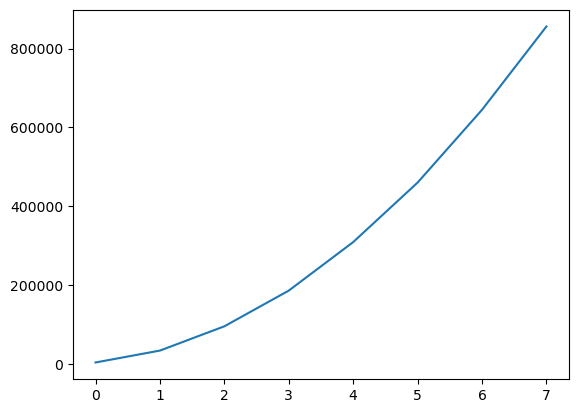

In [60]:
numbers_df[(numbers_df["step"] -65) % 131 == 0 ].reset_index(drop=True)["even"].plot()

In [65]:
numbers_df[(numbers_df["step"] -65) % 131 == 0 ].assign(diff=lambda df: df["even"] - df["even"].shift(1)).assign(diff_diff=lambda df: df["diff"] - df["diff"].shift(1))

,step,even,diff,diff_diff
0,65,3889,NaN,NaN
0,196,34074,30185.0,NaN
0,327,95591,61517.0,31332.0
0,458,186146,90555.0,29038.0
0,589,309181,123035.0,32480.0
0,720,460106,150925.0,27890.0
0,851,644659,184553.0,33628.0
0,982,855954,211295.0,26742.0


In [66]:
# https://github.com/Fadi88/AoC/blob/master/2023/day21/code.py
# no clue how to do it 
def part2():
    grid = set()
    free = set()

    x = 0
    for y, l in enumerate(open("21-input")):
        for x, c in enumerate(l):
            if c == "#":
                grid.add(x + y * 1j)
            elif c == "S":
                start = x + y * 1j
            elif c == ".":
                free.add(x + y * 1j)

    deltas = [1, -1, -1j, 1j]

    reach = {0: set([start])}

    grid_len = x + 1
    pts = []
    target_time = 26501365
    while len(pts) < 3:
        steps = max(reach.keys())

        if steps - 1 in reach:
            del reach[steps - 1]

        reach[steps + 1] = set()

        for pos in reach[steps]:
            for d in deltas:
                npt = pos + d
                nx = npt.real % grid_len
                ny = npt.imag % grid_len
                if nx + ny * 1j not in grid:
                    reach[steps + 1].add(pos + d)
        if (steps - (grid_len // 2) + 1) % grid_len == 0:
            pts.append(len(reach[max(reach.keys())]))

    c = pts[0]
    b = pts[1] - pts[0]
    a = pts[2] - pts[1]

    x = target_time // grid_len # remainder is already in the euqtion
    assert grid_len // 2 == target_time%grid_len

    print(c + b * x + (x * (x - 1) // 2) * (a - b))

part2()

623540829615589
